In [99]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import csv
import numpy as np

# figsize=(4.5,6)
figsize=(3,4.5)
figsize=(2.125*2, 0.875*2)
# figsize=(2.9*2, 1*2)
# figsize=(4.5,3.33)
# figsize=(5.33,4)
plt.figure(figsize=figsize)
label_font = {
    'size' : 14
}

label_font = {
    'size' : 11
}

<Figure size 306x126 with 0 Axes>

In [100]:
with open(
        'C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\data\\sissoresults\\calculated_barriers\\barriers.csv',
        'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    low_barriers = list(reader)
    low_barriers = [float(x[0]) for x in low_barriers]

with open(
        'C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\data\\sissoresults\\calculated_barriers\\barriers.csv',
        'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    high_barriers = list(reader)
    high_barriers = [float(x[0]) for x in high_barriers]
    
with open('C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\data\\all_data\\2020.04.withcharged.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    lines = list(reader)
    
# with open('C:\\Users\\theme\\Documents\\scrap\\train.dat', 'r') as csvfile:
#     reader = csv.reader(csvfile, delimiter=',')
#     lines = list(reader)

# with open('C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\sissoresults.csv', 'r') as csvfile:
#     reader = csv.reader(csvfile, delimiter='\t')
#     sissolines = list(reader)

with open(
'C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\data\\sissoresults\\2020.04.20.withcharged.3d.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter='\t')
    sissolines = list(reader)

def geti(header, lines=lines):
    return(lines[0].index(header))
ubi = geti('ub')
lbi = geti('lb')

def getcol(header, lines=lines):
    i = geti(header, lines=lines)
    try:
        return [float(x[i]) for x in lines[1:]]
    except:
        return [x[i] for x in lines[1:]]

def getavg(line):
    return (float(line[lbi]) + float(line[ubi]))/2

def getavgcol(lines=lines):
    return [getavg(line) for line in lines[1:]]

lowest_lines = []
prev_material = ''
best_line = lines[0]

for line in lines[1:]:
    material = line[0]
    i = int(line[1])
    if i >= 100 and i <= 200:
        continue
    elif material != prev_material:
        lowest_lines.append(best_line)
        best_line = line
    elif getavg(line) < getavg(best_line):
        best_line = line
    prev_material = material
# print('\n'.join(lines[0]))
# print(getcol('material'))

bins = np.linspace(0,5,25)
# bins = np.linspace(0,5,25)
ranges = [abs(float(x[4]) - float(x[3])) for x in lines[1:]]
lowest_ranges = [abs(float(x[4]) - float(x[3])) for x in lowest_lines[1:]]

1.6962133258749998
0.36112084810526096
0.7368421052631579


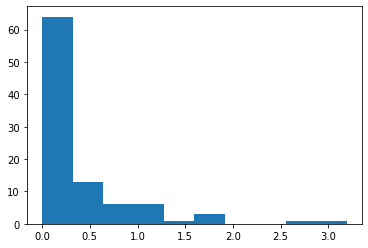

In [101]:
print(np.average(ranges))
print(np.average(lowest_ranges))
plt.hist(lowest_ranges)
print(len(np.where(np.array(lowest_ranges) < 0.5)[0])/len(lowest_ranges))


Total Failure    : 0.0992
Predicted Failure: 0.0893
SISSO Failure    : 0.0794


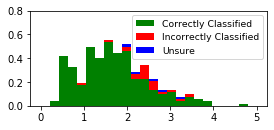

In [102]:
cutoff = 2.487
# cutoff = 3.875

# cutoff = 3.75
# cutoff = 1.8
# cutoff=1
definite = []
unsure = []

for line in lowest_lines[1:]:
    avg = getavg(line)
    ub = float(line[ubi])
    lb = float(line[lbi])
    if ub>cutoff and lb<cutoff:
        unsure.append(avg)
    else:
        definite.append(avg)
        

bound_def = np.histogram(definite, bins=bins)[0]
bound_uns = np.histogram(unsure, bins=bins)[0]

# print(len(unsure) / (len(unsure) + len(definite)))



samples = 100
sampled_y = []

definite = []
unsure = []
wrong = []

deviation = 0.2
deviation_factor = 2
bounded = []
almost_bounded = []
not_bounded = []

for line in sissolines[1:]:
    ub = float(line[1])
    lb = float(line[0])
    y = float(line[2])
    avg = (ub+lb)/2
    if y>cutoff and lb>cutoff and ub>cutoff:
        definite.append(y)
    elif y<cutoff and lb<cutoff and ub<cutoff:
        definite.append(y)
    elif ub>cutoff and lb<cutoff:
        unsure.append(y)
    else:
        wrong.append(y)
    
    if y > lb*(1-deviation) and y < ub*(1+deviation):
        bounded.append(y)
    elif y > lb*(1-deviation_factor*deviation) and y < ub*(1+deviation_factor*deviation):
        almost_bounded.append(y)
    else:
        not_bounded.append(y)
    # print(np.linspace(lb, ub, samples))
    sampled_y += list(np.linspace(lb, ub, samples))
        
plt.figure(figsize=figsize)
plt.hist([definite, wrong, unsure], stacked=True, bins=bins, density=True, color=['green', 'red', 'blue'])
# plt.plot([cutoff, cutoff], [0.7,0])
sisso_def = np.histogram(definite, bins=bins)[0]
sisso_uns = np.histogram(unsure, bins=bins)[0]
sisso_wrng = np.histogram(wrong, bins=bins)[0]
# plt.legend(['Fast/Slow Cutoff', 'Correctly Identfied', 'Misidentified', 'Unsure'])
plt.legend(['Correctly Classified', 'Incorrectly Classified', 'Unsure'],fontsize=9.25)
plt.ylim(0,0.8)
plt.savefig("C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\figures\\model.{}.nolabels.png".format('sisso'))
# plt.title('SISSO')
# plt.xlabel('Predicted Barrier (eV)', fontdict=label_font)
# plt.ylabel('Frequency of Prediction', fontdict=label_font)

plt.savefig("C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\figures\\model.{}.png".format('sisso'))
print('Total Failure    : {:6.4f}'.format((len(unsure)+len(wrong)) / (len(unsure) + len(definite) + len(wrong))))
print('Predicted Failure: {:6.4f}'.format((len(unsure)/2+len(wrong)) / (len(unsure) + len(definite) + len(wrong))))
print('SISSO Failure    : {:6.4f}'.format((len(wrong)) / (len(unsure) + len(definite) + len(wrong))))
# print('Success          : {:6.4f}'.format((len(definite) + len(wrong)) / (len(unsure) + len(definite) + len(wrong))))

1.6831730831150853


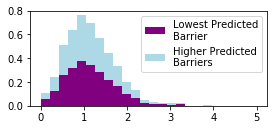

In [103]:
print(np.average(sampled_y))
# print(sampled_y)
plt.figure(figsize=figsize)
plt.hist([low_barriers, high_barriers], stacked=True, density=True, bins=bins, color=['purple', 'lightblue'])
plt.ylim([0,0.8])
plt.savefig("C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\figures\\model.{}.nolabels.png".format('bounded'))
# plt.title('Bounded TS Calculation')
# plt.xlabel('Predicted Barrier (eV)', fontdict=label_font)
# plt.ylabel('Frequency of Prediction', fontdict=label_font)
plt.legend(['Lowest Predicted\nBarrier', 'Higher Predicted\nBarriers'])
plt.savefig("C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\figures\\model.{}.png".format('calculated'))

1.6831730831150853


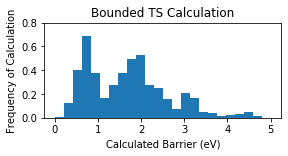

In [104]:
print(np.average(sampled_y))
# print(sampled_y)
plt.figure(figsize=figsize)
plt.hist(sampled_y, bins=bins,density=True)
plt.ylim(0,0.8)
plt.savefig("C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\figures\\model.{}.nolabels.png".format('bounded'))
plt.title('Bounded TS Calculation')
plt.xlabel('Calculated Barrier (eV)')
plt.ylabel('Frequency of Calculation')
plt.savefig("C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\figures\\model.{}.png".format('bounded'))

Text(0, 0.5, 'Frequency of Prediction')

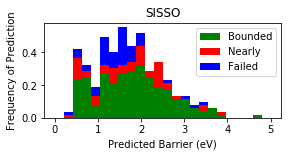

In [105]:
plt.figure(figsize=figsize)
plt.hist([bounded, almost_bounded, not_bounded], stacked=True, bins=bins, density=True, color=['green', 'red', 'blue'])
# plt.plot([cutoff, cutoff], [0.7,0])
sisso_def = np.histogram(definite, bins=bins)[0]
sisso_uns = np.histogram(unsure, bins=bins)[0]
sisso_wrng = np.histogram(wrong, bins=bins)[0]
plt.legend(['Bounded', 'Nearly', 'Failed'])
plt.title('SISSO')
plt.xlabel('Predicted Barrier (eV)')
plt.ylabel('Frequency of Prediction')

In [106]:
accuracy = np.divide(bound_def, bound_uns + bound_def)
accuracy = [1 if np.isnan(x) else x for x in accuracy]

precision = np.divide(sisso_def, sisso_uns + sisso_def)
precision = [1 if np.isnan(x) else x for x in precision]

sisso_accuracy = np.divide(sisso_wrng, bound_def)
sisso_accuracy = [1 if np.isnan(x) else x for x in sisso_accuracy]

print(sum(np.multiply(sisso_accuracy, bound_uns))/sum(bound_uns))

0.7333333333333333


D:\ProgramData\Miniconda3\envs\default\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
D:\ProgramData\Miniconda3\envs\default\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.
D:\ProgramData\Miniconda3\envs\default\lib\site-packages\ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys


In [107]:
def is_charged(row):
    i = int(row[1])
    if i >= 100 and i <= 200:
        return 1
    else:
        return 0

data = lines[1:]
is_uncharged = [ is_charged(row) for row in lines[1:]]
data = [line[6:] for line in data]
data = [[float(x) for x in line] for line in data]
y = getavgcol()

Total Failure    : 0.1445
Predicted Failure: 0.1257
Method Failure   : 0.1069


Text(0.5, 1, 'SVM')

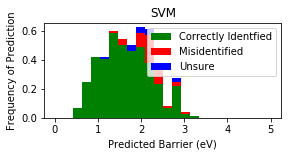

In [108]:
from sklearn import svm

clf = svm.SVR()
clf.fit([d for d in data], y)

def get_histogram(model, classifier=False,name='',rangetoolarge=1):
    prediction = model.predict(data)
    definite = []
    unsure = []
    wrong = []
    for i in range(len(prediction)):
        y = prediction[i]
        line = lines[i+1]
        
        ub = float(line[ubi])
        lb = float(line[lbi])
        avg = (ub+lb)/2
        if ub - lb > rangetoolarge:
            continue
        
        if classifier:
            if y == 1 and lb>cutoff and ub>cutoff:
                definite.append(avg)
            elif y == -1 and lb<cutoff and ub<cutoff:
                definite.append(avg)
            elif ub>cutoff and lb<cutoff:
                # print('{} {} {}'.format(line[0], lb, ub))
                unsure.append(avg)
            else:
                wrong.append(avg)
            
        else:
            if y>cutoff and lb>cutoff and ub>cutoff:
                definite.append(y)
            elif y<cutoff and lb<cutoff and ub<cutoff:
                definite.append(y)
            elif ub>cutoff and lb<cutoff:
                unsure.append(y)
            else:
                wrong.append(y)
        
    plt.figure(figsize=figsize)
    plt.hist([definite, wrong, unsure], stacked=True, bins=bins, density=True,
             color=['green', 'red', 'blue'])
    plt.legend(['Correctly Identfied', 'Misidentified', 'Unsure'])
    # print((len(wrong)) / (len(unsure) + len(definite) + len(wrong)))
    plt.xlabel('Predicted Barrier (eV)')
    plt.ylabel('Frequency of Prediction')
    plt.title(name)
    
    plt.savefig("C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\figures\\model.{}.png".format(name))
    # plt.savefig("C:\\Users\\theme\\Documents\\scrap\\model.{}.png".format(name))
    print('Total Failure    : {:6.4f}'.format((len(unsure)+len(wrong)) / (len(unsure) + len(definite) + len(wrong))))
    print('Predicted Failure: {:6.4f}'.format((len(unsure)/2+len(wrong)) / (len(unsure) + len(definite) + len(wrong))))
    print('Method Failure   : {:6.4f}'.format((len(wrong)) / (len(unsure) + len(definite) + len(wrong))))
    # print((len(unsure)+len(wrong)) / (len(unsure) + len(definite) + len(wrong)))
    # print((len(unsure)/2+len(wrong)) / (len(unsure) + len(definite) + len(wrong)))

get_histogram(clf)
plt.title('SVM')

<class 'sklearn.tree._classes.DecisionTreeRegressor'>
Total Failure    : 0.0434
Predicted Failure: 0.0246
Method Failure   : 0.0058


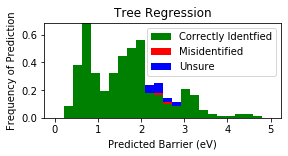

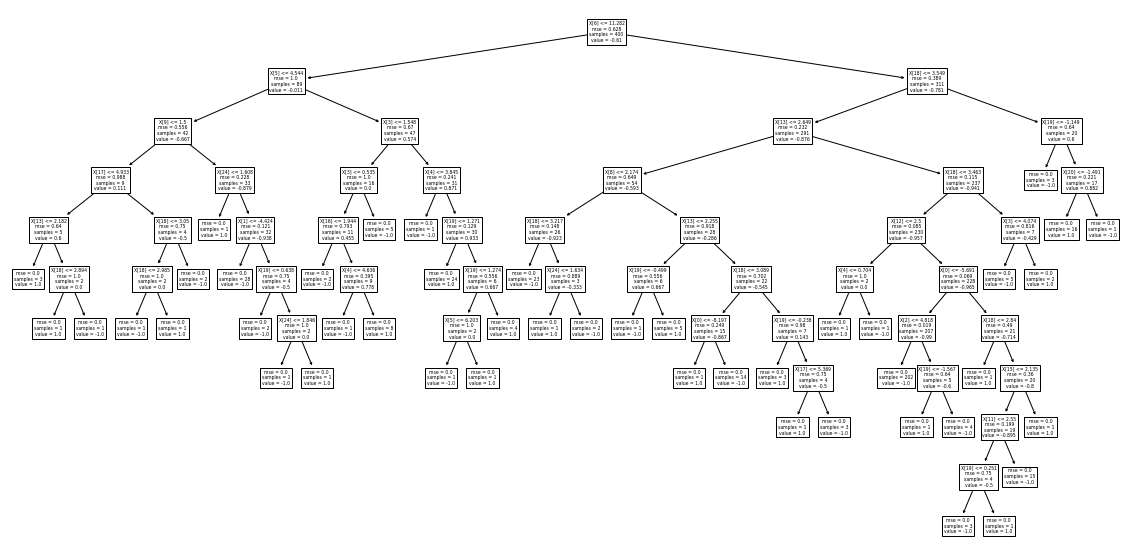

<Figure size 306x126 with 0 Axes>

In [109]:
from sklearn import tree
yclass = [-1 if x<cutoff else 1 for x in y]

clf = tree.DecisionTreeRegressor()
print(clf.__class__)
clf.fit(data, y)
get_histogram(clf, name='Tree Regression')
import graphviz
plt.figure(figsize=(20,10))
tree.plot_tree(clf.fit(data, yclass))
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=lines[0][6:],
                                class_names=['Fast', 'Slow'])
graph = graphviz.Source(dot_data)
graph.render("C:\\Users\\theme\\Documents\\scrap\\tree")
plt.figure(figsize=figsize)
plt.show()

Total Failure    : 0.0780
Predicted Failure: 0.0592
Method Failure   : 0.0405


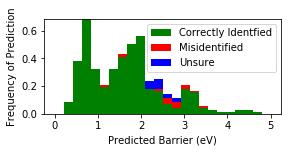

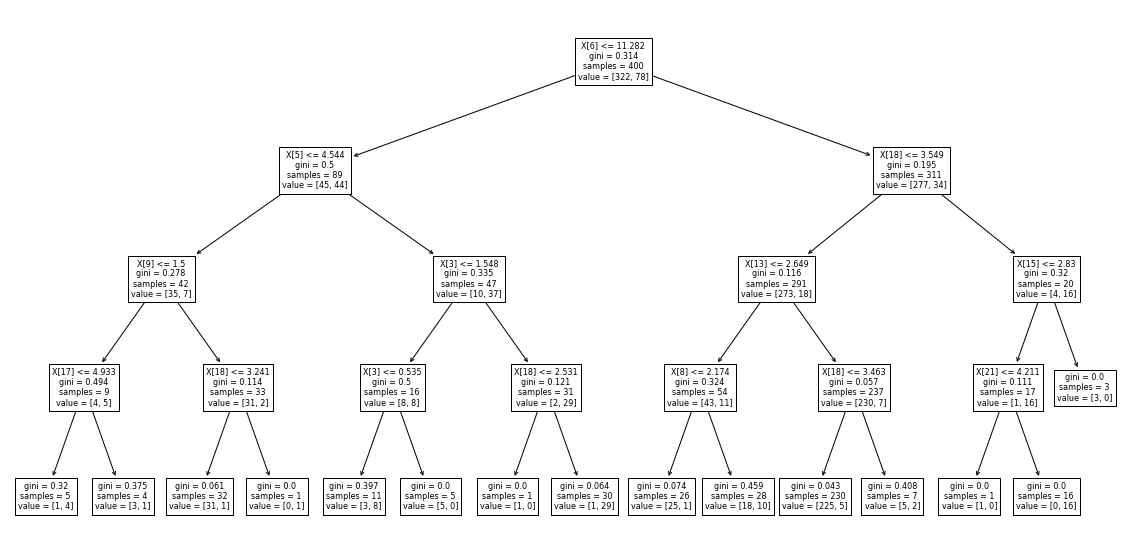

<Figure size 306x126 with 0 Axes>

In [110]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=4)
clf.fit(data,  yclass)
get_histogram(clf, classifier=True, name='Decision Tree Classifier')
plt.title('')
plt.show()
import graphviz
plt.figure(figsize=(20,10))
tree.plot_tree(clf.fit(data, yclass))
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=lines[0][6:],
                                class_names=['Fast', 'Slow'])
graph = graphviz.Source(dot_data)
graph.render("C:\\Users\\RyanTrottier\\PycharmProjects\\materials\\figures\\tree")
plt.figure(figsize=figsize)
plt.show()

Total Failure    : 0.1214
Predicted Failure: 0.1026
Method Failure   : 0.0838


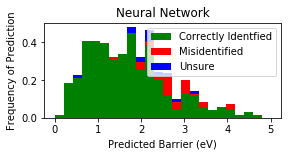

In [111]:
from sklearn import neural_network

clf = neural_network.MLPRegressor(solver='lbfgs', max_iter=10000, 
                                  hidden_layer_sizes=(100,))
clf.fit(data, y)
get_histogram(clf)
plt.title('Neural Network')
plt.show()



Total Failure    : 0.3642
Predicted Failure: 0.3454
Method Failure   : 0.3266


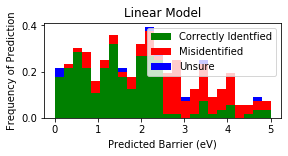

In [112]:
from sklearn import linear_model

clf = linear_model.LinearRegression()
clf.fit(data, y)
get_histogram(clf, name='Linear Model')
plt.title('Linear Model')
plt.show()




In [113]:
labels=lines[0][6:]
print(labels.index('bond_A_length'))
print(labels.index('diffusion_distance'))

print(labels.index('band_gap'))
print(is_charged)


print(labels.index('bond_A_length'))
print(labels.index('diffusion_distance'))


print(labels.index('formation_energy'))
print(labels.index('atomization_energy'))

8
18
2
<function is_charged at 0x000001E1B341AD08>
8
18
20
21
